In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import time
import struct
import requests
from datetime import datetime, timedelta
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from scipy.fftpack import fft
from scipy.signal import get_window, spectrogram
import pickle
import re

# only 111

In [50]:
#ZCU111 SBL list >5%
zcu111_list=[
 'LERFUJI_2024-11-15_08-22-08.npz',
 'LERFUJI_2024-10-15_01-18-06.npz',
 'LERFUJI_2024-10-27_13-43-55.npz',
 'LERFUJI_2024-11-04_04-14-19.npz',
 'LERFUJI_2024-11-02_13-51-41.npz',
 'LERFUJI_2024-11-02_08-54-09.npz',
 'LERFUJI_2024-10-20_10-14-52.npz',
 'LERFUJI_2024-10-27_23-44-12.npz',
 'LERFUJI_2024-10-28_02-30-07.npz',
 'LERFUJI_2024-11-11_05-25-24.npz',
 'LERFUJI_2024-10-30_02-02-03.npz',
 'LERFUJI_2024-11-04_09-57-37.npz',
 'LERFUJI_2024-10-22_00-58-30.npz',
 'LERFUJI_2024-11-18_03-28-51.npz',
 'LERFUJI_2024-10-16_01-29-20.npz',
 'LERFUJI_2024-11-16_03-39-21.npz',
 'LERFUJI_2024-11-04_22-05-43.npz',
 'LERFUJI_2024-10-26_20-37-51.npz',
 'LERFUJI_2024-10-18_03-07-24.npz',
 'LERFUJI_2024-10-18_09-17-07.npz',
 'LERFUJI_2024-11-06_04-06-18.npz',
 'LERFUJI_2024-10-15_23-43-13.npz',
 'LERFUJI_2024-10-15_20-22-59.npz',
 'LERFUJI_2024-10-18_03-27-52.npz',
 'LERFUJI_2024-10-21_07-54-25.npz',
 'LERFUJI_2024-10-29_22-59-36.npz',
 'LERFUJI_2024-10-15_22-52-26.npz',
 'LERFUJI_2024-10-16_02-27-58.npz',
 'LERFUJI_2024-10-22_02-30-09.npz',
 'LERFUJI_2024-10-22_09-20-05.npz',
 'LERFUJI_2024-10-23_03-16-57.npz',
 'LERFUJI_2024-10-20_13-51-29.npz',
 'LERFUJI_2024-10-13_09-25-06.npz',
 'LERFUJI_2024-11-10_03-27-52.npz',
 'LERFUJI_2024-11-09_23-06-12.npz',
 'LERFUJI_2024-11-03_17-35-45.npz',
 'LERFUJI_2024-10-16_04-52-14.npz',
 'LERFUJI_2024-10-15_08-37-16.npz',
 'LERFUJI_2024-10-21_08-08-53.npz',
 'LERFUJI_2024-10-14_01-44-58.npz',
 'LERFUJI_2024-10-17_09-02-58.npz',
 'LERFUJI_2024-10-29_23-49-03.npz',
 'LERFUJI_2024-11-02_19-05-51.npz',
 'LERFUJI_2024-10-13_00-10-19.npz',
 'LERFUJI_2024-11-05_11-56-33.npz',
 'LERFUJI_2024-11-03_01-33-25.npz',
 'LERFUJI_2024-10-20_20-21-44.npz',
 'LERFUJI_2024-10-19_02-46-12.npz',
 'LERFUJI_2024-11-02_12-30-45.npz',
 'LERFUJI_2024-11-04_21-12-50.npz',
 'LERFUJI_2024-10-18_15-51-23.npz',
 'LERFUJI_2024-11-03_17-56-46.npz',
 'LERFUJI_2024-10-28_19-13-27.npz',
 'LERFUJI_2024-10-22_09-56-32.npz',
 'LERFUJI_2024-10-27_05-01-04.npz',
 'LERFUJI_2024-10-29_15-19-37.npz',
 'LERFUJI_2024-10-18_02-29-34.npz',
 'LERFUJI_2024-11-01_03-49-06.npz',
 'LERFUJI_2024-11-03_20-11-52.npz',
 'LERFUJI_2024-11-03_23-57-50.npz',
 'LERFUJI_2024-10-15_05-30-08.npz',
 'LERFUJI_2024-11-22_23-42-46.npz',
 'LERFUJI_2024-11-06_05-48-50.npz',
 'LERFUJI_2024-10-19_06-12-19.npz',
 'LERFUJI_2024-10-27_21-28-33.npz',
 'LERFUJI_2024-10-27_05-25-07.npz',
 'LERFUJI_2024-11-11_11-42-48.npz',
 'LERFUJI_2024-10-19_06-35-20.npz',
 'LERFUJI_2024-10-15_11-30-38.npz',
 'LERFUJI_2024-10-20_11-00-25.npz',
 'LERFUJI_2024-11-05_04-53-14.npz',
 'LERFUJI_2024-10-22_03-20-25.npz',
 'LERFUJI_2024-11-08_08-50-27.npz',
 'LERFUJI_2024-10-29_01-41-14.npz',
 'LERFUJI_2024-11-05_10-37-18.npz',
 'LERFUJI_2024-11-02_16-48-53.npz',
 'LERFUJI_2024-10-27_06-55-20.npz',
 'LERFUJI_2024-10-17_09-32-06.npz',
 'LERFUJI_2024-11-01_04-31-16.npz',
 'LERFUJI_2024-10-19_18-05-55.npz',
 'LERFUJI_2024-11-13_23-16-26.npz',
 'LERFUJI_2024-10-13_14-34-59.npz',
 'LERFUJI_2024-10-21_00-35-06.npz',
 'LERFUJI_2024-10-29_19-49-12.npz',
 'LERFUJI_2024-11-03_03-33-06.npz',
 'LERFUJI_2024-10-19_05-21-33.npz',
 'LERFUJI_2024-11-16_01-15-10.npz',
 'LERFUJI_2024-10-28_02-06-05.npz',
 'LERFUJI_2024-11-09_08-59-06.npz',
 'LERFUJI_2024-10-19_21-33-36.npz',
 'LERFUJI_2024-10-27_15-32-04.npz',
 'LERFUJI_2024-11-04_14-40-20.npz',
 #'LERFUJI_2024-10-22_10-40-44.npz',
 'LERFUJI_2024-10-29_17-51-52.npz',
 'LERFUJI_2024-10-29_03-00-30.npz',
 'LERFUJI_2024-11-08_16-43-14.npz',
 'LERFUJI_2024-10-13_12-47-29.npz',
 'LERFUJI_2024-11-08_16-58-08.npz',
 'LERFUJI_2024-10-18_23-01-11.npz',
 'LERFUJI_2024-10-15_20-56-49.npz',
 'LERFUJI_2024-11-03_11-46-08.npz',
 'LERFUJI_2024-10-22_09-37-16.npz',
 'LERFUJI_2024-10-14_02-20-24.npz',
 'LERFUJI_2024-10-28_02-55-30.npz',
 'LERFUJI_2024-10-27_15-10-13.npz',
 'LERFUJI_2024-10-19_10-19-12.npz',
 'LERFUJI_2024-10-14_15-02-49.npz',
 'LERFUJI_2024-11-05_10-06-20.npz',
 'LERFUJI_2024-10-27_06-17-55.npz',
 'LERFUJI_2024-10-30_02-30-10.npz',
 'LERFUJI_2024-10-18_19-22-55.npz',
 'LERFUJI_2024-11-11_10-54-27.npz',
 'LERFUJI_2024-10-19_09-05-05.npz',
 'LERFUJI_2024-10-19_00-02-36.npz',
 'LERFUJI_2024-10-21_00-19-58.npz',
 'LERFUJI_2024-11-11_12-41-57.npz',
 'LERFUJI_2024-11-03_03-58-26.npz',
 'LERFUJI_2024-10-26_16-37-24.npz',
 'LERFUJI_2024-11-05_16-29-27.npz',
 'LERFUJI_2024-11-12_19-38-00.npz',
 'LERFUJI_2024-11-05_20-32-53.npz',
 'LERFUJI_2024-11-07_16-25-57.npz',
 'LERFUJI_2024-11-15_20-34-41.npz',
 'LERFUJI_2024-10-21_08-59-35.npz',
 'LERFUJI_2024-10-27_02-02-02.npz']

In [28]:
def make_plot(filename1):
    npz_kw = np.load('/mnt/SBOR/2024c_RFSoC/ZCU111/Abort/'+filename1,allow_pickle=True)
    X_sum=npz_kw['X_sum']
    X_delta=npz_kw['X_delta']
    Y_sum=npz_kw['Y_sum']
    Y_delta=npz_kw['Y_delta']
    print(len(X_sum))

    
    if filename1=="LERFUJI_2024-10-16_08-57-48.npz":
        return
    if filename1=="LERFUJI_2024-10-15_19-08-53.npz":
        return
    if filename1=="LERFUJI_2024-10-16_01-58-36.npz":
        Y_sum=np.zeros(len(Y_delta))

    timesteps2=np.arange(len(X_sum))/509
    timesteps2=timesteps2-timesteps2[-1]
    
    ##################    



    df = pd.DataFrame({'x':timesteps2,'X_sum':X_sum,'X_delta':X_delta,'Y_sum':Y_sum,'Y_delta':Y_delta})
    threshold=2000
    # 条件に従って 'result' を計算
    df['result_x'] = np.where(df['X_sum'] > threshold, df['X_delta'] / df['X_sum']*(16.58/5), 0)
    # 'result' から オフセットの値を引き算
    df['result_diff_x'] = df['result_x'] 
    offset = df['result_x'].iloc[0:5120].reset_index(drop=True)  # 1行目から5120行目の値
    
    for i in range(1, len(df) // 5120):
        start = i * 5120
        end = start + 5120-1
        df.loc[start:end, 'result_diff_x'] -= offset.values
    # 絶対値が 0.4 を超える場合は 0 に設定
    df['result_diff_x'] = np.where(abs(df['result_diff_x']) > 0.7, 0, df['result_diff_x'])
    # 'X_sum' が 2000 より小さい行の 'result' を NaN にする
    df['result_diff_x'] = np.where(df['X_sum'] <= threshold, np.nan, df['result_diff_x'])
    moving_avg = df['result_diff_x'].dropna().rolling(window=500).mean()
    moving_std = df['result_diff_x'].dropna().rolling(window=500).std()
    # 元のDataFrameに移動平均をマージ
    df['x_moving_avg'] = moving_avg.reindex(df.index)
    df['x_moving_std'] = moving_std.reindex(df.index)
    df['result_diff_x'] = np.where(df['X_sum'] <= threshold, 0, df['result_diff_x'])
    df['result_interp_x']=df['result_diff_x']#.interpolate(method='spline',order=1)

    df['result_y'] = np.where(df['X_sum'] > threshold, df['Y_delta'] / df['Y_sum']*(16.58/5), 0)
    # 'result' から 51200 行上の値を引き算
    df['result_diff_y'] = df['result_y']
    offset = df['result_y'].iloc[0:5120].reset_index(drop=True)  # 1行目から5120行目の値
    for i in range(1, len(df) // 5120):
        start = i * 5120
        end = start + 5120-1
        df.loc[start:end, 'result_diff_y'] -= offset.values
    # 絶対値が 0.4 を超える場合は 0 に設定
    df['result_diff_y'] = np.where(abs(df['result_diff_y']) > 0.7, 0, df['result_diff_y'])
    # 'X_sum' が 2000 より小さい行の 'result' を NaN にする
    df['result_diff_y'] = np.where(df['X_sum'] <= threshold, np.nan, df['result_diff_y'])
    moving_avg = df['result_diff_y'].dropna().rolling(window=500).mean()
    moving_std = df['result_diff_y'].dropna().rolling(window=500).std()
    # 元のDataFrameに移動平均をマージ
    df['y_moving_avg'] = moving_avg.reindex(df.index)
    df['y_moving_std'] = moving_std.reindex(df.index)
    df['result_diff_y'] = np.where(df['X_sum'] <= threshold, 0, df['result_diff_y'])
    df['result_interp_y']=df['result_diff_y']#.interpolate(method='spline',order=1)

    # 条件に従って 'result' を計算
    df['result_charge'] = np.where(df['X_sum'] > threshold,  df['X_sum']+df['Y_sum'], np.nan)
    # 'result' から 51200 行上の値を引き算
    df['result_diff_charge'] = df['result_charge'] / df['result_charge'].shift(51200)

    condition = df['X_sum'] <= 2000
    # 連続する2000以下の行数をカウント
    df['group'] = (condition != condition.shift()).cumsum()
    df['count'] = df.groupby('group')['X_sum'].transform('size')
    # 2000以下の連続が300行以上になる部分を削除
    index_to_drop = df[(condition) & (df['count'] >= 300)].index[0] if len(df[(condition) & (df['count'] >= 300)]) > 0 else None
    # 該当部分を削除
    if index_to_drop is not None:
        df = df[:index_to_drop]  # 連続部分の開始行以降を削除



    step_size = 40
    turn=len(df)//5120-10
    if turn<10:
        return np.nan
    tbtdata_111_x=df['result_interp_x'].iloc[len(df)-5120*turn:len(df)-0*5120].values
    tbtdata_111_x_ma=df['x_moving_avg'].iloc[len(df)-5120*turn:len(df)-0*5120].values
    tbtdata_111_x_std=df['x_moving_std'].iloc[len(df)-5120*turn:len(df)-0*5120].values
    tbtdata_111_y=df['result_interp_y'].iloc[len(df)-5120*turn:len(df)-0*5120].values
    tbtdata_111_y_ma=df['y_moving_avg'].iloc[len(df)-5120*turn:len(df)-0*5120].values
    tbtdata_111_y_std=df['y_moving_std'].iloc[len(df)-5120*turn:len(df)-0*5120].values
    charge_111=df['result_diff_charge'].iloc[len(df)-5120*turn:len(df)-0*5120].values
    
    #tbtdata_111=tbtdata_111.reshape(turn,5120)
    turn111=turn

    a=tbtdata_111_x_ma[-80*5120:]
    b=tbtdata_111_x_std[-80*5120:]*0.5
    index_111 = next(
            (i for i, (a_val, b_val) in enumerate(zip(a, b))
             if not np.isnan(a_val) and not np.isnan(b_val) and abs(a_val) > b_val),
            80*5120
        )
    index_111=index_111-80*5120
    print(index_111)
    a=tbtdata_111_y_ma[-80*5120:]
    b=tbtdata_111_y_std[-80*5120:]*0.5
    index_111_y = next(
            (i for i, (a_val, b_val) in enumerate(zip(a, b))
             if not np.isnan(a_val) and not np.isnan(b_val) and abs(a_val) > b_val),
            80*5120
        )
    index_111_y=index_111_y-80*5120
    print(index_111_y)

    fig, (ax1,ax2,ax3) = plt.subplots(3, 1, sharex=True,figsize=(16,6))
    timeaxis=np.arange(len(tbtdata_111_x))/5120
    timeaxis=timeaxis-timeaxis[-1]
    ax1.set_title(f'{filename1[8:-4]}')
    ax1.scatter(timeaxis,tbtdata_111_x,c='red',s=1)
    ax1.plot(timeaxis,tbtdata_111_x_ma,'o-',c='green',markersize=0.02)
    #ax1.plot(timeaxis,tbtdata_111_x_std,'o-',c='green',markersize=1)
    time_111=timeaxis[index_111]
    ax1.vlines(time_111,-0.6,0.6)
    ax1.grid()
    ax1.set_ylim(-0.6,0.6)
    ax1.set_ylabel('Fuji X pos (mm)')
    timeaxis=np.arange(len(tbtdata_111_y))/5120
    timeaxis=timeaxis-timeaxis[-1]
    ax2.scatter(timeaxis,tbtdata_111_y,c='red',s=1)
    ax2.plot(timeaxis,tbtdata_111_y_ma,'o-',c='green',markersize=0.02)
    #ax2.plot(timeaxis,tbtdata_111_y_std,'o-',c='green',markersize=1)
    time_111_y=timeaxis[index_111_y]
    ax2.vlines(time_111_y,-0.6,0.6)
    ax2.grid()
    ax2.set_ylim(-0.6,0.6)
    #ax2.set_xticks([-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0])
    ax2.set_ylabel('Fuji Y pos (mm)')
    
    timeaxis=np.arange(len(charge_111))/5120
    timeaxis=timeaxis-timeaxis[-1]
    ax3.scatter(timeaxis,charge_111,c='blue',s=1)
    index_charge_111 = next((i for i, x in enumerate(charge_111[-5120*10:]) if x < 0.95), None)
    if index_charge_111 is None:
        print('not SBL')
        plt.close()
        return
    index_charge_111+=5120*10
    charge_time_111=timeaxis[len(charge_111)-5120*20+index_charge_111]
    ax3.vlines(charge_time_111,0,1.2)
    ax3.grid()
    ax3.set_ylim(0,1.2)
    #ax3.set_xticks([-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0])
    ax3.set_ylabel('Fuji charge (a.u.)')
    
    plt.xlim(-80,0)
    plt.xlabel('Turn')
    plt.savefig(f'masterthesis/{filename1[8:-4]}_111.png',dpi=100)
    plt.close()
    print(time_111)
    print(time_111_y)

    fig, (ax1,ax2,ax3) = plt.subplots(3, 1, sharex=True,figsize=(16,6))
    timeaxis=np.arange(len(tbtdata_111_x))/5120
    timeaxis=timeaxis-timeaxis[-1]
    ax1.set_title(f'{filename1[8:-4]}')
    ax1.scatter(timeaxis,tbtdata_111_x,c='red',s=1)
    ax1.plot(timeaxis,tbtdata_111_x_ma,'o-',c='green',markersize=0.02)
    #ax1.plot(timeaxis,tbtdata_111_x_std,'o-',c='green',markersize=1)
    time_111=timeaxis[index_111]
    ax1.vlines(time_111,-0.6,0.6)
    ax1.grid()
    ax1.set_ylim(-0.6,0.6)
    ax1.set_ylabel('Fuji X pos (mm)')
    timeaxis=np.arange(len(tbtdata_111_y))/5120
    timeaxis=timeaxis-timeaxis[-1]
    ax2.scatter(timeaxis,tbtdata_111_y,c='red',s=1)
    ax2.plot(timeaxis,tbtdata_111_y_ma,'o-',c='green',markersize=0.02)
    #ax2.plot(timeaxis,tbtdata_111_y_std,'o-',c='green',markersize=1)
    time_111_y=timeaxis[index_111_y]
    ax2.vlines(time_111_y,-0.6,0.6)
    ax2.grid()
    ax2.set_ylim(-0.6,0.6)
    #ax2.set_xticks([-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0])
    ax2.set_ylabel('Fuji Y pos (mm)')
    
    timeaxis=np.arange(len(charge_111))/5120
    timeaxis=timeaxis-timeaxis[-1]
    ax3.scatter(timeaxis,charge_111,c='blue',s=1)
    index_charge_111 = next((i for i, x in enumerate(charge_111[-5120*10:]) if x < 0.95), None)
    if index_charge_111 is None:
        print('not SBL')
        plt.close()
        return
    index_charge_111+=5120*10
    charge_time_111=timeaxis[len(charge_111)-5120*20+index_charge_111]
    ax3.vlines(charge_time_111,0,1.2)
    ax3.grid()
    ax3.set_ylim(0,1.2)
    ax3.set_xticks([-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0])
    ax3.set_ylabel('Fuji charge (a.u.)')
    
    plt.xlim(-15,0)
    plt.xlabel('Turn')
    plt.savefig(f'masterthesis/{filename1[8:-4]}_111_2.png',dpi=100)
    plt.close()

    return time_111,time_111_y, np.nanmax(tbtdata_111_x)-np.nanmin(tbtdata_111_x) ,np.nanmax(tbtdata_111_y)-np.nanmin(tbtdata_111_y) ,charge_time_111



524288
-39
-399798
-0.007421875000005684
-78.08535156250001
524288
-101155
-68357
-19.756640625000003
-13.350781249999997


KeyboardInterrupt: 

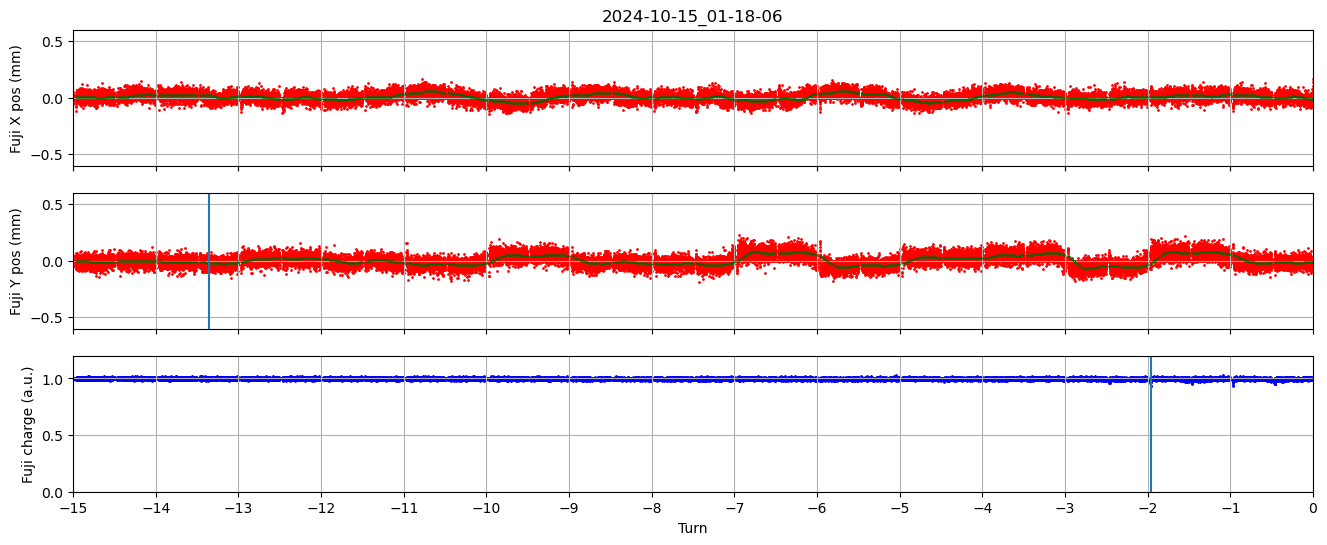

In [31]:
time_111_x=[]
time_111_y=[]
amp_111_x=[]
amp_111_y=[]
charge_111=[]

for i in zcu111_list:
    a,b,c,d,e=make_plot(i)
    time_111_x.append(a)
    time_111_y.append(b)
    amp_111_x.append(c)
    amp_111_y.append(d)
    charge_111.append(e)

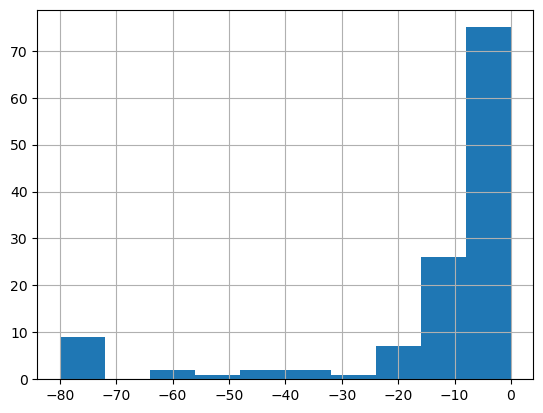

In [21]:
plt.hist(time_111_x)
plt.grid()
plt.show()

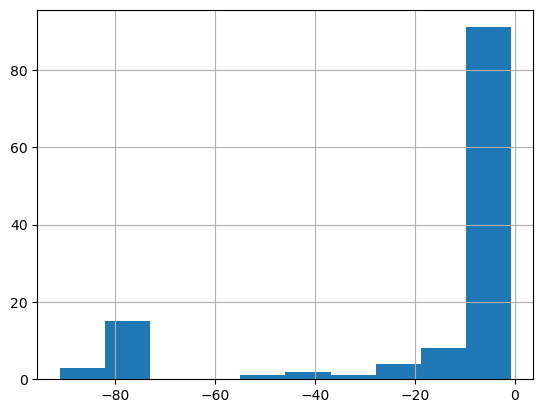

In [22]:
plt.hist(time_111_y)
plt.grid()
plt.show()

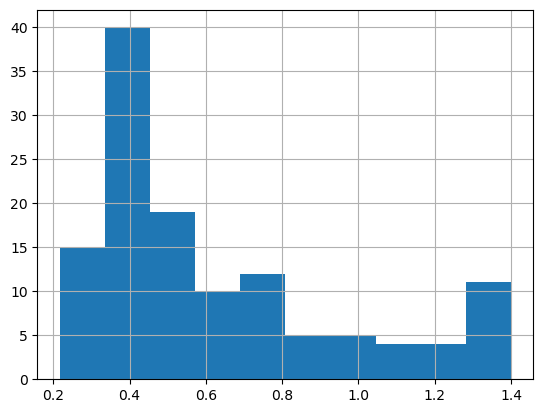

In [23]:
plt.hist(amp_111_x)
plt.grid()
plt.show()

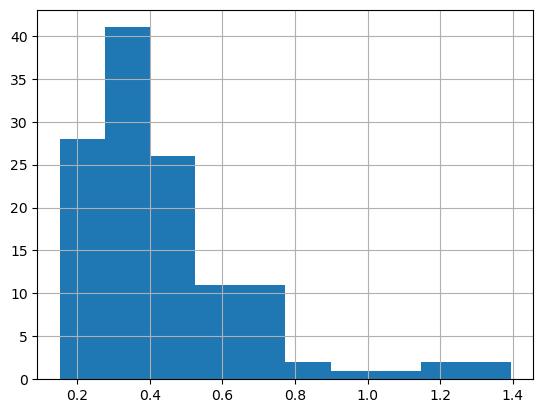

In [25]:
plt.hist(amp_111_y)
plt.grid()
plt.show()

# combined analysis

In [51]:
def get_file_timestamp(filename):
    # ファイル名からタイムスタンプを抽出
    match = re.search(r'_(\d{4}-\d{2}-\d{2}_\d{2}-\d{2}-\d{2})\.npz$', filename)
    return match.group(1) if match else None

def generate_possible_timestamps(timestamp_str):
    # 文字列のタイムスタンプをdatetimeオブジェクトに変換
    timestamp = datetime.strptime(timestamp_str, "%Y-%m-%d_%H-%M-%S")
    # -1秒, 0秒, +1秒の3つのタイムスタンプを生成
    return [
        (timestamp + timedelta(seconds=offset)).strftime("%Y-%m-%d_%H-%M-%S")
        for offset in [-1, 0, 1]
    ]

def find_matching_files_from_lists(files_dir1, dir2):
    # ディレクトリ2のファイル名をセットに変換して検索を効率化
    files_dir2 = os.listdir(dir2)
    files_dir2_set = set(files_dir2)
    matching_files = []

    for file1 in files_dir1:
        timestamp_str = get_file_timestamp(file1)
        
        if timestamp_str:
            # ±1秒のタイムスタンプ候補を生成
            possible_timestamps = generate_possible_timestamps(timestamp_str)
            
            # ディレクトリ2に一致するタイムスタンプのファイルがあるか確認
            for ts in possible_timestamps:
                matching_file = next((f2 for f2 in files_dir2_set if ts in f2), None)
                if matching_file:
                    matching_files.append((file1, matching_file))
                    break  # 最初に一致したファイルのみ記録
    
    return matching_files

# 使用例
files_dir1 = zcu111_list
dir2 = '/mnt/SBOR/2024c_RFSoC/ZCU208/Abort/'
matches = find_matching_files_from_lists(files_dir1, dir2)

fuji_file = []
D5_file = []
# 結果の表示
for file1, file2 in matches:
    fuji_file.append(file1)
    D5_file.append(file2)
    print(f"Match found: {file1} in list, {file2} in dir2")

Match found: LERFUJI_2024-11-15_08-22-08.npz in list, LERD5_2024-11-15_08-22-08.npz in dir2
Match found: LERFUJI_2024-10-15_01-18-06.npz in list, LERD5_2024-10-15_01-18-06.npz in dir2
Match found: LERFUJI_2024-10-27_13-43-55.npz in list, LERD5_2024-10-27_13-43-55.npz in dir2
Match found: LERFUJI_2024-11-04_04-14-19.npz in list, LERD5_2024-11-04_04-14-19.npz in dir2
Match found: LERFUJI_2024-11-02_13-51-41.npz in list, LERD5_2024-11-02_13-51-41.npz in dir2
Match found: LERFUJI_2024-11-02_08-54-09.npz in list, LERD5_2024-11-02_08-54-09.npz in dir2
Match found: LERFUJI_2024-10-20_10-14-52.npz in list, LERD5_2024-10-20_10-14-52.npz in dir2
Match found: LERFUJI_2024-10-27_23-44-12.npz in list, LERD5_2024-10-27_23-44-12.npz in dir2
Match found: LERFUJI_2024-10-28_02-30-07.npz in list, LERD5_2024-10-28_02-30-07.npz in dir2
Match found: LERFUJI_2024-11-11_05-25-24.npz in list, LERD5_2024-11-11_05-25-24.npz in dir2
Match found: LERFUJI_2024-10-30_02-02-03.npz in list, LERD5_2024-10-30_02-02-03.

In [57]:
def make_spectrum(filename1,filename2,mark=0):
    npz_kw = np.load('/mnt/SBOR/2024c_RFSoC/ZCU111/Abort/'+filename1,allow_pickle=True)
    X_sum=npz_kw['X_sum']
    X_delta=npz_kw['X_delta']
    Y_sum=npz_kw['Y_sum']
    Y_delta=npz_kw['Y_delta']

    
    if filename1=="LERFUJI_2024-10-16_08-57-48.npz" or filename1=="LERFUJI_2024-10-16_02-27-58.npz":
        return np.nan,np.nan,np.nan,np.nan
    if filename1=="LERFUJI_2024-10-15_19-08-53.npz":
        return np.nan,np.nan,np.nan,np.nan
    if filename1=="LERFUJI_2024-10-16_01-58-36.npz":
        Y_sum=np.zeros(len(Y_delta))

    timesteps2=np.arange(len(X_sum))/509
    timesteps2=timesteps2-timesteps2[-1]
    
    ##################    



    df = pd.DataFrame({'x':timesteps2,'X_sum':X_sum,'X_delta':X_delta,'Y_sum':Y_sum,'Y_delta':Y_delta})
    threshold=2000
    # 条件に従って 'result' を計算
    df['result_x'] = np.where(df['X_sum'] > threshold, df['X_delta'] / df['X_sum']*(16.58/5), 0)
    # 'result' から オフセットの値を引き算
    df['result_diff_x'] = df['result_x'] 
    offset = df['result_x'].iloc[0:5120].reset_index(drop=True)  # 1行目から5120行目の値
    for i in range(1, len(df) // 5120):
        start = i * 5120
        end = start + 5120-1
        df.loc[start:end, 'result_diff_x'] -= offset.values
    # 絶対値が 0.4 を超える場合は 0 に設定
    df['result_diff_x'] = np.where(abs(df['result_diff_x']) > 0.7, 0, df['result_diff_x'])
    # 'X_sum' が 2000 より小さい行の 'result' を NaN にする
    df['result_diff_x'] = np.where(df['X_sum'] <= threshold, np.nan, df['result_diff_x'])
    moving_avg = df['result_diff_x'].dropna().rolling(window=500).mean()
    moving_std = df['result_diff_x'].dropna().rolling(window=500).std()
    # 元のDataFrameに移動平均をマージ
    df['x_moving_avg'] = moving_avg.reindex(df.index)
    df['x_moving_std'] = moving_std.reindex(df.index)
    df['result_diff_x'] = np.where(df['X_sum'] <= threshold, 0, df['result_diff_x'])
    df['result_interp_x']=df['result_diff_x']#.interpolate(method='spline',order=1)

    df['result_y'] = np.where(df['X_sum'] > threshold, df['Y_delta'] / df['Y_sum']*(16.58/5), 0)
    # 'result' から 51200 行上の値を引き算
    df['result_diff_y'] = df['result_y']
    offset = df['result_y'].iloc[0:5120].reset_index(drop=True)  # 1行目から5120行目の値
    for i in range(1, len(df) // 5120):
        start = i * 5120
        end = start + 5120-1
        df.loc[start:end, 'result_diff_y'] -= offset.values
    # 絶対値が 0.4 を超える場合は 0 に設定
    df['result_diff_y'] = np.where(abs(df['result_diff_y']) > 0.7, 0, df['result_diff_y'])
    # 'X_sum' が 2000 より小さい行の 'result' を NaN にする
    df['result_diff_y'] = np.where(df['X_sum'] <= threshold, np.nan, df['result_diff_y'])
    moving_avg = df['result_diff_y'].dropna().rolling(window=500).mean()
    moving_std = df['result_diff_y'].dropna().rolling(window=500).std()
    # 元のDataFrameに移動平均をマージ
    df['y_moving_avg'] = moving_avg.reindex(df.index)
    df['y_moving_std'] = moving_std.reindex(df.index)
    df['result_diff_y'] = np.where(df['X_sum'] <= threshold, 0, df['result_diff_y'])
    df['result_interp_y']=df['result_diff_y']#.interpolate(method='spline',order=1)

    # 条件に従って 'result' を計算
    df['result_charge'] = np.where(df['X_sum'] > threshold,  df['X_sum']+df['Y_sum'], np.nan)
    # 'result' から 51200 行上の値を引き算
    df['result_diff_charge'] = df['result_charge'] / df['result_charge'].shift(51200)

    condition = df['X_sum'] <= 2000
    # 連続する2000以下の行数をカウント
    df['group'] = (condition != condition.shift()).cumsum()
    df['count'] = df.groupby('group')['X_sum'].transform('size')
    # 2000以下の連続が300行以上になる部分を削除
    index_to_drop = df[(condition) & (df['count'] >= 300)].index[0] if len(df[(condition) & (df['count'] >= 300)]) > 0 else None
    # 該当部分を削除
    if index_to_drop is not None:
        df = df[:index_to_drop]  # 連続部分の開始行以降を削除



    step_size = 40
    turn=len(df)//5120-10
    if turn<10:
        return np.nan
    tbtdata_111_x=df['result_interp_x'].iloc[len(df)-5120*turn:len(df)-0*5120].values
    tbtdata_111_x_ma=df['x_moving_avg'].iloc[len(df)-5120*turn:len(df)-0*5120].values
    tbtdata_111_x_std=df['x_moving_std'].iloc[len(df)-5120*turn:len(df)-0*5120].values
    tbtdata_111_y=df['result_interp_y'].iloc[len(df)-5120*turn:len(df)-0*5120].values
    tbtdata_111_y_ma=df['y_moving_avg'].iloc[len(df)-5120*turn:len(df)-0*5120].values
    tbtdata_111_y_std=df['y_moving_std'].iloc[len(df)-5120*turn:len(df)-0*5120].values
    charge_111=df['result_diff_charge'].iloc[len(df)-5120*turn:len(df)-0*5120].values
    
    #tbtdata_111=tbtdata_111.reshape(turn,5120)
    turn111=turn

    a=tbtdata_111_x_ma[-80*5120:]
    b=tbtdata_111_x_std[-80*5120:]*0.5
    index_111 = next(
            (i for i, (a_val, b_val) in enumerate(zip(a, b))
             if not np.isnan(a_val) and not np.isnan(b_val) and abs(a_val) > b_val),
            80*5120
        )
    index_111=index_111-80*5120
    print(index_111)
    a=tbtdata_111_y_ma[-80*5120:]
    b=tbtdata_111_y_std[-80*5120:]*0.5
    index_111_y = next(
            (i for i, (a_val, b_val) in enumerate(zip(a, b))
             if not np.isnan(a_val) and not np.isnan(b_val) and abs(a_val) > b_val),
            80*5120
        )
    index_111_y=index_111_y-80*5120
    print(index_111_y)


    #######################################
    #
    #               ZCU208
    #
    ########################################
    npz_kw = np.load('/mnt/SBOR/2024c_RFSoC/ZCU208/Abort/'+filename2,allow_pickle=True)
    AC_sum=npz_kw['AC_sum']
    AC_delta=npz_kw['AC_delta']
    BD_sum=npz_kw['BD_sum']
    BD_delta=npz_kw['BD_delta']

    
    timesteps2=np.arange(len(AC_sum))/5120
    timesteps2=timesteps2-timesteps2[-1]

    ##################    


    df = pd.DataFrame({'x':timesteps2,'AC_sum':AC_sum,'AC_delta':AC_delta,'BD_sum':BD_sum,'BD_delta':BD_delta})
    threshold=500
    # 条件に従って 'result' を計算
    df['result_AC'] = np.where(df['AC_sum'] > threshold, df['AC_delta'] / df['AC_sum']*(16.58/5), 0)
    # 'result' から 51200 行上の値を引き算
    df['result_diff_AC'] = df['result_AC']
    offset = df['result_AC'].iloc[0:5120].reset_index(drop=True)  # 1行目から5120行目の値
    for i in range(1, len(df) // 5120):
        start = i * 5120
        end = start + 5120-1
        df.loc[start:end, 'result_diff_AC'] -= offset.values
    # 絶対値が 0.4 を超える場合は 0 に設定
    df['result_diff_AC'] = np.where(abs(df['result_diff_AC']) > 0.7, 0, df['result_diff_AC'])
    # 'X_sum' が 2000 より小さい行の 'result' を NaN にする
    df['result_diff_AC'] = np.where(df['AC_sum'] <= threshold, np.nan, df['result_diff_AC'])
    moving_avg = df['result_diff_AC'].dropna().rolling(window=500).mean()
    moving_std = df['result_diff_AC'].dropna().rolling(window=500).std()
    # 元のDataFrameに移動平均をマージ
    df['AC_moving_avg'] = moving_avg.reindex(df.index)
    df['AC_moving_std'] = moving_std.reindex(df.index)
    df['result_diff_AC'] = np.where(df['AC_sum'] <= threshold, 0, df['result_diff_AC'])
    df['result_interp_AC']=df['result_diff_AC']#.interpolate(method='spline',order=1)

    # 条件に従って 'result' を計算
    df['result_BD'] = np.where(df['AC_sum'] > threshold, df['BD_delta'] / df['BD_sum']*(16.58/5), 0)
    # 'result' から 51200 行上の値を引き算
    df['result_diff_BD'] = df['result_BD']
    offset = df['result_BD'].iloc[0:5120].reset_index(drop=True)  # 1行目から5120行目の値
    for i in range(1, len(df) // 5120):
        start = i * 5120
        end = start + 5120-1
        df.loc[start:end, 'result_diff_BD'] -= offset.values
    # 絶対値が 0.4 を超える場合は 0 に設定
    df['result_diff_BD'] = np.where(abs(df['result_diff_BD']) > 0.7, 0, df['result_diff_BD'])
    # 'X_sum' が 2000 より小さい行の 'result' を NaN にする
    df['result_diff_BD'] = np.where(df['AC_sum'] <= threshold, np.nan, df['result_diff_BD'])
    moving_avg = df['result_diff_BD'].dropna().rolling(window=500).mean()
    moving_std = df['result_diff_BD'].dropna().rolling(window=500).std()
    # 元のDataFrameに移動平均をマージ
    df['BD_moving_avg'] = moving_avg.reindex(df.index)
    df['BD_moving_std'] = moving_std.reindex(df.index)
    df['result_diff_BD'] = np.where(df['AC_sum'] <= threshold, 0, df['result_diff_BD'])
    df['result_interp_BD']=df['result_diff_BD']#.interpolate(method='spline',order=1)

    # 条件に従って 'result' を計算
    df['result_charge'] = np.where(df['AC_sum'] > threshold,  df['AC_sum'], np.nan)
    # 'result' から 51200 行上の値を引き算
    df['result_diff_charge'] = df['result_charge'] / df['result_charge'].shift(51200)
    
    df['result_diff_x']=(df['result_interp_AC']-df['result_interp_BD'])/np.sqrt(2)
    # 'X_sum' が 2000 より小さい行の 'result' を NaN にする
    df['result_diff_x'] = np.where(df['AC_sum'] <= threshold, np.nan, df['result_diff_x'])
    moving_avg = df['result_diff_x'].dropna().rolling(window=500).mean()
    moving_std = df['result_diff_x'].dropna().rolling(window=500).std()
    # 元のDataFrameに移動平均をマージ
    df['x_moving_avg'] = moving_avg.reindex(df.index)
    df['x_moving_std'] = moving_std.reindex(df.index)
    df['result_diff_x'] = np.where(df['AC_sum'] <= threshold, 0, df['result_diff_x'])
    df['result_interp_x']=df['result_diff_x']#.interpolate(method='spline',order=1)
    
    df['result_diff_y']=(df['result_interp_AC']+df['result_interp_BD'])/np.sqrt(2)
    # 'X_sum' が 2000 より小さい行の 'result' を NaN にする
    df['result_diff_y'] = np.where(df['AC_sum'] <= threshold, np.nan, df['result_diff_y'])
    moving_avg = df['result_diff_y'].dropna().rolling(window=500).mean()
    moving_std = df['result_diff_y'].dropna().rolling(window=500).std()
    # 元のDataFrameに移動平均をマージ
    df['y_moving_avg'] = moving_avg.reindex(df.index)
    df['y_moving_std'] = moving_std.reindex(df.index)
    df['result_diff_y'] = np.where(df['AC_sum'] <= threshold, 0, df['result_diff_y'])
    df['result_interp_y']=df['result_diff_y']#.interpolate(method='spline',order=1)

    condition = df['AC_sum'] <= 2000
    # 連続する2000以下の行数をカウント
    df['group'] = (condition != condition.shift()).cumsum()
    df['count'] = df.groupby('group')['AC_sum'].transform('size')
    # 2000以下の連続が300行以上になる部分を削除
    index_to_drop = df[(condition) & (df['count'] >= 300)].index[0] if len(df[(condition) & (df['count'] >= 300)]) > 0 else None
    # 該当部分を削除
    if index_to_drop is not None:
        df = df[:index_to_drop]  # 連続部分の開始行以降を削除


    step_size = 40
    turn=len(df)//5120-10
    if turn<10:
        return np.nan,np.nan,np.nan,np.nan
    tbtdata_208_x=df['result_interp_AC'].iloc[len(df)-5120*turn:len(df)-0*5120].values
    tbtdata_208_x_ma=df['AC_moving_avg'].iloc[len(df)-5120*turn:len(df)-0*5120].values
    tbtdata_208_x_std=df['AC_moving_std'].iloc[len(df)-5120*turn:len(df)-0*5120].values
    tbtdata_208_y=df['result_interp_BD'].iloc[len(df)-5120*turn:len(df)-0*5120].values
    tbtdata_208_y_ma=df['BD_moving_avg'].iloc[len(df)-5120*turn:len(df)-0*5120].values
    tbtdata_208_y_std=df['BD_moving_std'].iloc[len(df)-5120*turn:len(df)-0*5120].values
    charge_208=df['result_diff_charge'].iloc[len(df)-5120*turn:len(df)-0*5120].values

    if mark==1:
        tbtdata_208_x=df['result_interp_AC'].iloc[len(df)-5120*turn:len(df)-0*5120].values
        tbtdata_208_x_ma=df['AC_moving_avg'].iloc[len(df)-5120*turn:len(df)-0*5120].values
        tbtdata_208_x_std=df['AC_moving_std'].iloc[len(df)-5120*turn:len(df)-0*5120].values
        tbtdata_208_y=df['result_interp_BD'].iloc[len(df)-5120*turn:len(df)-0*5120].values
        tbtdata_208_y_ma=df['BD_moving_avg'].iloc[len(df)-5120*turn:len(df)-0*5120].values
        tbtdata_208_y_std=df['BD_moving_std'].iloc[len(df)-5120*turn:len(df)-0*5120].values
        charge_208=df['result_diff_charge'].iloc[len(df)-5120*turn:len(df)-0*5120].values
    turn208=turn

    a=tbtdata_208_x_ma[-80*5120:]
    b=tbtdata_208_x_std[-80*5120:]*0.605
    index_208 = next(
            (i for i, (a_val, b_val) in enumerate(zip(a, b))
             if not np.isnan(a_val) and not np.isnan(b_val) and abs(a_val) > b_val),
            0
        )
    index_208=index_208-80*5120
    print(index_208)
    a=tbtdata_208_y_ma[-80*5120:]
    b=tbtdata_208_y_std[-80*5120:]*0.605
    index_208_y = next(
            (i for i, (a_val, b_val) in enumerate(zip(a, b))
             if not np.isnan(a_val) and not np.isnan(b_val) and abs(a_val) > b_val),
            0
        )
    index_208_y=index_208_y-80*5120
    print(index_208_y)


    ##########  PLOT  ############
    fig, (ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(6, 1, sharex=True,figsize=(16,12))
    timeaxis=np.arange(len(tbtdata_111_x))/5120
    timeaxis=timeaxis-timeaxis[-1]
    ax1.set_title(f'{filename1[8:-4]}')
    ax1.scatter(timeaxis,tbtdata_111_x,c='red',s=1)
    ax1.plot(timeaxis,tbtdata_111_x_ma,'o-',c='green',markersize=0.02)
    #ax1.plot(timeaxis,tbtdata_111_x_std,'o-',c='green',markersize=1)
    time_111=timeaxis[index_111]
    ax1.vlines(time_111,-0.6,0.6)
    ax1.grid()
    ax1.set_ylim(-0.6,0.6)
    ax1.set_ylabel('Fuji X pos (mm)')
    timeaxis=np.arange(len(tbtdata_111_y))/5120
    timeaxis=timeaxis-timeaxis[-1]
    ax2.scatter(timeaxis,tbtdata_111_y,c='red',s=1)
    ax2.plot(timeaxis,tbtdata_111_y_ma,'o-',c='green',markersize=0.02)
    #ax2.plot(timeaxis,tbtdata_111_y_std,'o-',c='green',markersize=1)
    time_111_y=timeaxis[index_111_y]
    ax2.vlines(time_111_y,-0.6,0.6)
    ax2.grid()
    ax2.set_ylim(-0.6,0.6)
    #ax2.set_xticks([-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0])
    ax2.set_ylabel('Fuji Y pos (mm)')
    
    timeaxis=np.arange(len(charge_111))/5120
    timeaxis=timeaxis-timeaxis[-1]
    ax3.scatter(timeaxis,charge_111,c='blue',s=1)
    index_charge_111 = next((i for i, x in enumerate(charge_111[-5120*10:]) if x < 0.95), None)
    if index_charge_111 is None:
        print('not SBL')
        plt.close()
        return 
    index_charge_111+=5120*10
    charge_time_111=timeaxis[len(charge_111)-5120*20+index_charge_111]
    ax3.vlines(charge_time_111,0,1.2)
    ax3.grid()
    ax3.set_ylim(0,1.2)
    #ax3.set_xticks([-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0])
    ax3.set_ylabel('Fuji charge (a.u.)')

    timeaxis=np.arange(len(tbtdata_208_x))/5120
    timeaxis=timeaxis-timeaxis[-1]-1
    ax4.set_title(f'{filename1[8:-4]}')
    ax4.scatter(timeaxis,tbtdata_208_x,c='red',s=1)
    ax4.plot(timeaxis,tbtdata_208_x_ma,'o-',c='green',markersize=0.02)
    #ax1.plot(timeaxis,tbtdata_111_x_std,'o-',c='green',markersize=1)
    time_208=timeaxis[index_208]
    ax4.vlines(time_208,-0.8,0.8)
    ax4.grid()
    ax4.set_ylim(-0.8,0.8)
    ax4.set_ylabel('D5 X pos (mm)')
    timeaxis=np.arange(len(tbtdata_208_y))/5120
    timeaxis=timeaxis-timeaxis[-1]-1
    ax5.scatter(timeaxis,tbtdata_208_y,c='red',s=1)
    ax5.plot(timeaxis,tbtdata_208_y_ma,'o-',c='green',markersize=0.02)
    #ax2.plot(timeaxis,tbtdata_111_y_std,'o-',c='green',markersize=1)
    time_208_y=timeaxis[index_208_y]
    ax5.vlines(time_208_y,-0.8,0.8)
    ax5.grid()
    ax5.set_ylim(-0.8,0.8)
    ax5.set_xticks([-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0])
    ax5.set_ylabel('D5 Y pos (mm)')

    timeaxis=np.arange(len(charge_208))/5120
    timeaxis=timeaxis-timeaxis[-1]-1
    ax6.scatter(timeaxis,charge_208,c='blue',s=1)
    index_charge_208 =next((i for i, x in enumerate(charge_208[-5120*10:]) if x < 0.97), 5120*10)
    if index_charge_208 is None:
        index
    index_charge_208+=5120*10
    charge_time_208=timeaxis[len(charge_208)-5120*20+index_charge_208]
    ax6.vlines(charge_time_208,0,1.2)
    ax6.grid()
    ax6.set_ylim(0,1.2)
    ax6.set_ylabel('D5 charge (a.u.)')
    ax6.set_xticks([-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0])
    
    plt.xlim(-15,0)
    plt.xlabel('Turn')
    plt.savefig(f'masterthesis/combined/{filename1[8:-4]}.png',dpi=100)
    plt.close()

    fig, (ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(6, 1, sharex=True,figsize=(16,12))
    timeaxis=np.arange(len(tbtdata_111_x))/5120
    timeaxis=timeaxis-timeaxis[-1]
    ax1.set_title(f'{filename1[8:-4]}')
    ax1.scatter(timeaxis,tbtdata_111_x,c='red',s=1)
    ax1.plot(timeaxis,tbtdata_111_x_ma,'o-',c='green',markersize=0.02)
    #ax1.plot(timeaxis,tbtdata_111_x_std,'o-',c='green',markersize=1)
    time_111=timeaxis[index_111]
    ax1.vlines(time_111,-0.6,0.6)
    ax1.grid()
    ax1.set_ylim(-0.6,0.6)
    ax1.set_ylabel('Fuji X pos (mm)')
    timeaxis=np.arange(len(tbtdata_111_y))/5120
    timeaxis=timeaxis-timeaxis[-1]
    ax2.scatter(timeaxis,tbtdata_111_y,c='red',s=1)
    ax2.plot(timeaxis,tbtdata_111_y_ma,'o-',c='green',markersize=0.02)
    #ax2.plot(timeaxis,tbtdata_111_y_std,'o-',c='green',markersize=1)
    time_111_y=timeaxis[index_111_y]
    ax2.vlines(time_111_y,-0.6,0.6)
    ax2.grid()
    ax2.set_ylim(-0.6,0.6)
    #ax2.set_xticks([-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0])
    ax2.set_ylabel('Fuji Y pos (mm)')
    
    timeaxis=np.arange(len(charge_111))/5120
    timeaxis=timeaxis-timeaxis[-1]
    ax3.scatter(timeaxis,charge_111,c='blue',s=1)
    index_charge_111 = next((i for i, x in enumerate(charge_111[-5120*10:]) if x < 0.95), None)
    if index_charge_111 is None:
        print('not SBL')
        plt.close()
        return 
    index_charge_111+=5120*10
    charge_time_111=timeaxis[len(charge_111)-5120*20+index_charge_111]
    ax3.vlines(charge_time_111,0,1.2)
    ax3.grid()
    ax3.set_ylim(0,1.2)
    #ax3.set_xticks([-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0])
    ax3.set_ylabel('Fuji charge (a.u.)')

    timeaxis=np.arange(len(tbtdata_208_x))/5120
    timeaxis=timeaxis-timeaxis[-1]-1
    ax4.set_title(f'{filename1[8:-4]}')
    ax4.scatter(timeaxis,tbtdata_208_x,c='red',s=1)
    ax4.plot(timeaxis,tbtdata_208_x_ma,'o-',c='green',markersize=0.02)
    #ax1.plot(timeaxis,tbtdata_111_x_std,'o-',c='green',markersize=1)
    time_208=timeaxis[index_208]
    ax4.vlines(time_208,-0.8,0.8)
    ax4.grid()
    ax4.set_ylim(-0.8,0.8)
    ax4.set_ylabel('D5 X pos (mm)')
    timeaxis=np.arange(len(tbtdata_208_y))/5120
    timeaxis=timeaxis-timeaxis[-1]-1
    ax5.scatter(timeaxis,tbtdata_208_y,c='red',s=1)
    ax5.plot(timeaxis,tbtdata_208_y_ma,'o-',c='green',markersize=0.02)
    #ax2.plot(timeaxis,tbtdata_111_y_std,'o-',c='green',markersize=1)
    time_208_y=timeaxis[index_208_y]
    ax5.vlines(time_208_y,-0.8,0.8)
    ax5.grid()
    ax5.set_ylim(-0.8,0.8)
    #ax5.set_xticks([-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0])
    ax5.set_ylabel('D5 Y pos (mm)')

    timeaxis=np.arange(len(charge_208))/5120
    timeaxis=timeaxis-timeaxis[-1]-1
    ax6.scatter(timeaxis,charge_208,c='blue',s=1)
    index_charge_208 =next((i for i, x in enumerate(charge_208[-5120*10:]) if x < 0.97), 5120*10)
    if index_charge_208 is None:
        index
    index_charge_208+=5120*10
    charge_time_208=timeaxis[len(charge_208)-5120*20+index_charge_208]
    ax6.vlines(charge_time_208,0,1.2)
    ax6.grid()
    ax6.set_ylim(0,1.2)
    ax6.set_ylabel('D5 charge (a.u.)')
    #ax6.set_xticks([-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0])
    
    plt.xlim(-80,0)
    plt.xlabel('Turn')
    plt.savefig(f'masterthesis/combined/{filename1[8:-4]}_2.png',dpi=100)
    plt.close()

    
    
    return time_111, time_111_y,time_208,time_208_y

In [59]:
target_datetime = datetime(2024, 10, 27, 7, 0, 0)
time_111_x=[]
time_111_y=[]
time_208_x=[]
time_208_y=[]
for i in range(len(fuji_file)):
    print(fuji_file[i])
    mark=0
    datetime_str = fuji_file[i][8:-4]  # "YYYYMMDD_HHMMSS" 部分
    file_datetime = datetime.strptime(datetime_str, "%Y-%m-%d_%H-%M-%S")
    if file_datetime < target_datetime:
        mark=1
    a,b,c,d=make_spectrum(fuji_file[i],D5_file[i],mark=mark)
    time_111_x.append(a)
    time_111_y.append(b)
    time_208_x.append(c)
    time_208_y.append(d)

LERFUJI_2024-11-15_08-22-08.npz
-39
-399798
-385638
-408735
LERFUJI_2024-10-15_01-18-06.npz
-101155
-68357
-61063
-73026
LERFUJI_2024-10-27_13-43-55.npz
-22760
-14594
-211561
-13494
LERFUJI_2024-11-04_04-14-19.npz
-33055
-27210
-58098
-13243
LERFUJI_2024-11-02_13-51-41.npz
-23434
-16258
-402385
-180876
LERFUJI_2024-11-02_08-54-09.npz
-27155
-32451
-216491
-22443
LERFUJI_2024-10-20_10-14-52.npz
-17237
-11833
-409600
-390368
LERFUJI_2024-10-27_23-44-12.npz
-24339
-23151
-399491
-11245
LERFUJI_2024-10-28_02-30-07.npz
-12920
-6765
-7271
-6193
LERFUJI_2024-11-11_05-25-24.npz
-27878
-404233
-52275
-23915
LERFUJI_2024-10-30_02-02-03.npz
-28674
-22717
-203936
-222958
LERFUJI_2024-11-04_09-57-37.npz
-407353
-20901
-406275
-401731
LERFUJI_2024-10-22_00-58-30.npz
-43104
-6603
-50513
-43698
LERFUJI_2024-11-18_03-28-51.npz
-25865
-407125
-407262
-390338
LERFUJI_2024-10-16_01-29-20.npz
-36439
-22535
-33489
-397205
LERFUJI_2024-11-16_03-39-21.npz
-9705
-408405
-408058
-408199
LERFUJI_2024-11-04_22-05

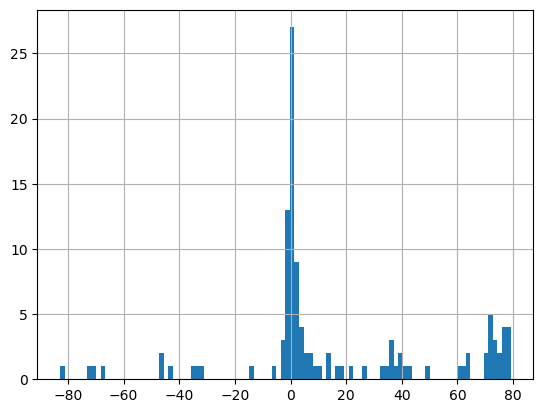

In [62]:
plt.hist(np.array(time_111_x)-np.array(time_208_x),bins=100)
plt.grid()
plt.show()